In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from ucimlrepo import fetch_ucirepo
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow_addons.optimizers import AdamW, Yogi  # You need TensorFlow Addons for AdamW and Yogi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If 

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597) 
  
# data (as pandas dataframes) 
X = productivity_prediction_of_garment_employees.data.features 
y = productivity_prediction_of_garment_employees.data.targets 
  
# metadata 
# print(productivity_prediction_of_garment_employees.metadata) 
  
# # variable information 
# print(productivity_prediction_of_garment_employees.variables) 


In [4]:
df = pd.DataFrame(X, columns=productivity_prediction_of_garment_employees.feature_names)

In [5]:
y.head()

,actual_productivity
0,0.940725
1,0.886500
2,0.800570
3,0.800570
4,0.800382


In [6]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 131.0+ 

In [8]:
# Check the column names of the DataFrame
print(df.columns)

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers'],
      dtype='object')


In [9]:
# # df.drop(columns=[ "Date"], inplace=True)
df.drop(columns=["date"], inplace=True)

In [10]:
df.isna().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
dtype: int64

In [11]:
df.shape

(1197, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    691 non-null    float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 121.7+ KB


In [13]:
df.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
dtype: int64

In [14]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000


In [15]:
df.shape

(1197, 13)

Categorical Features

In [16]:
categorical_cols = ['quarter', 'department', 'day', 'team','no_of_style_change'] 

In [17]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0


In [18]:
df['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

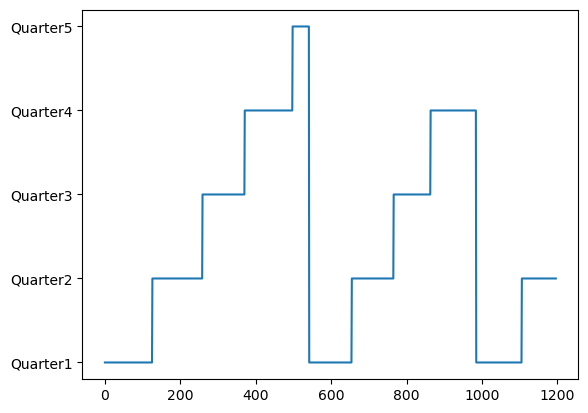

In [19]:
pyplot.plot(df.index,df.quarter)
plt.show()

In [20]:
df_1=df[df['quarter']=='Quarter5']

In [21]:
df_1.shape

(44, 13)

In [22]:
df_1.index

Index([498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511,
       512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525,
       526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541],
      dtype='int64')

In [23]:
df.department.value_counts() 

department
sweing       691
finishing    506
Name: count, dtype: int64

In [24]:
df.day.value_counts() 

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

In [25]:
df.select_dtypes(include=np.number).columns.tolist()

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers']

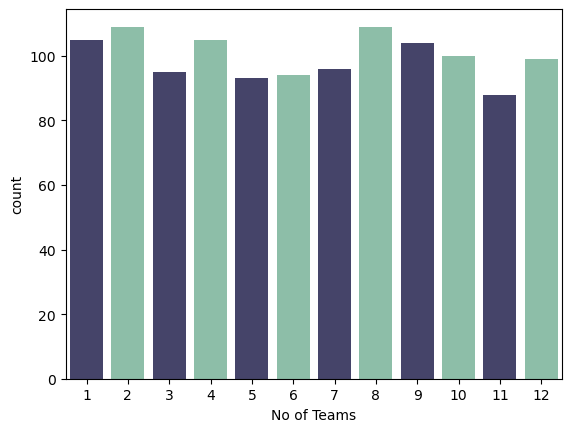

In [26]:
ax = sns.countplot(x = 'team', data = df, palette=["#3f3e6fd1", "#85c6a9"])
plt.xlabel('No of Teams')
plt.show()

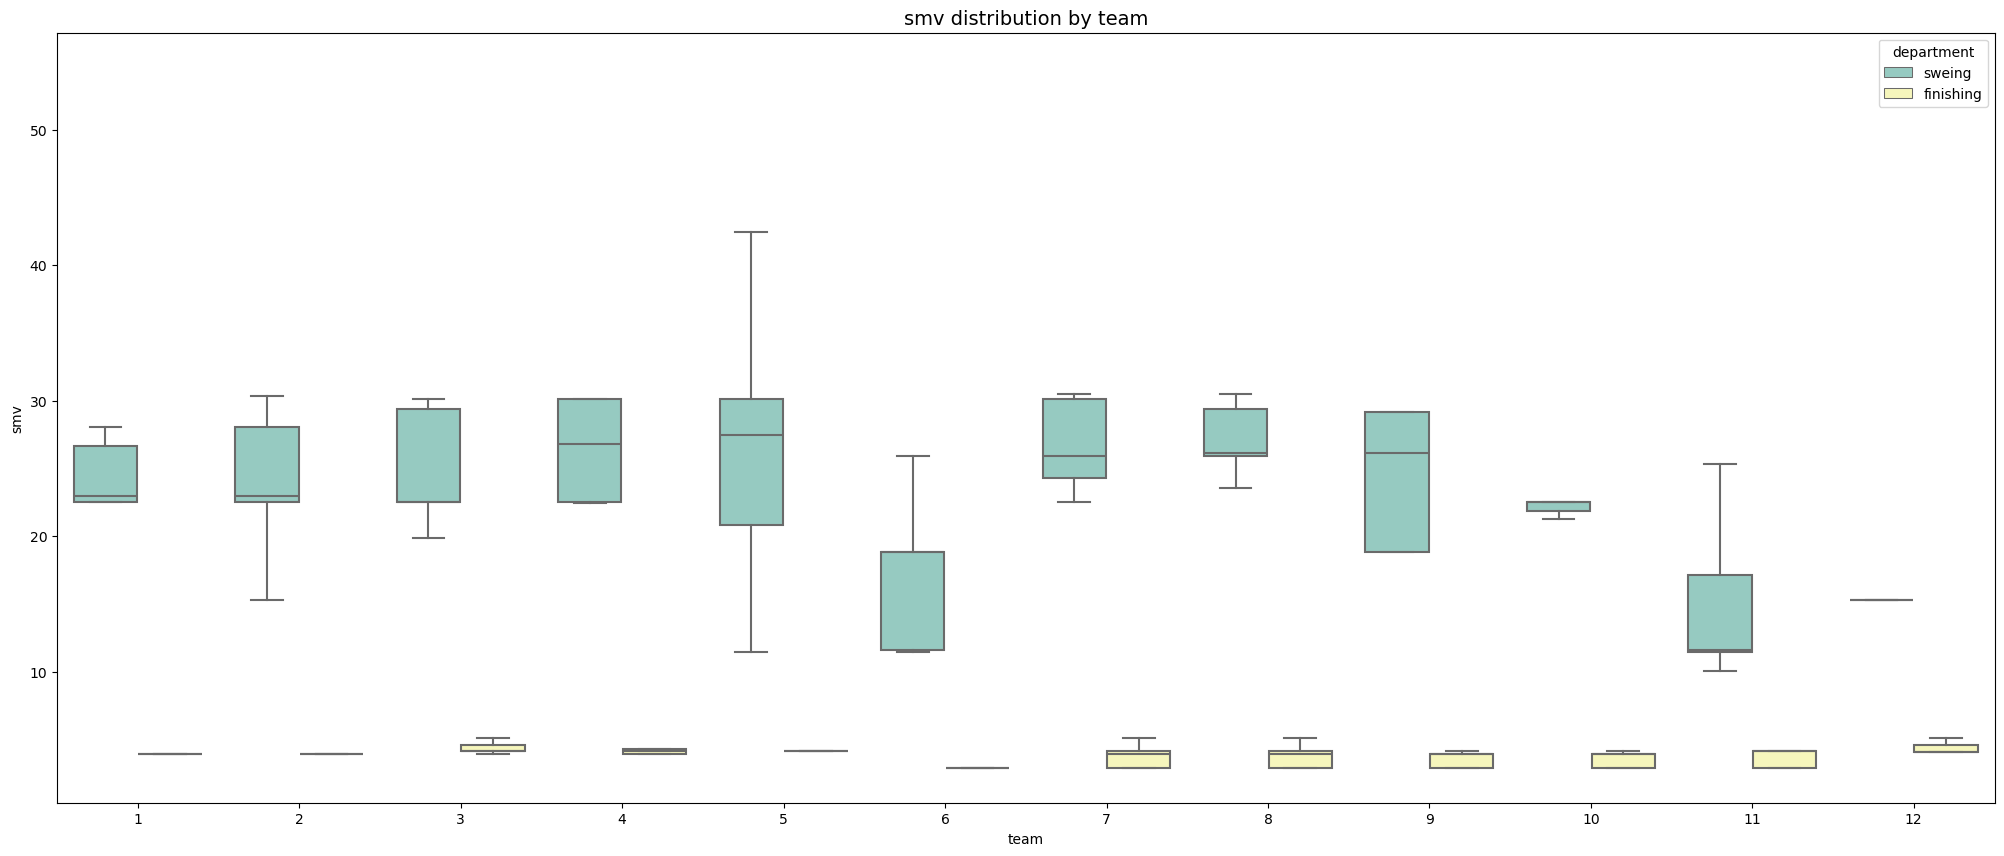

In [27]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x="team", y="smv", hue="department", data = df,
     palette = palette, fliersize = 0)

plt.title('smv distribution by team',fontsize= 14)
plt.show()

<Axes: xlabel='no_of_workers', ylabel='smv'>

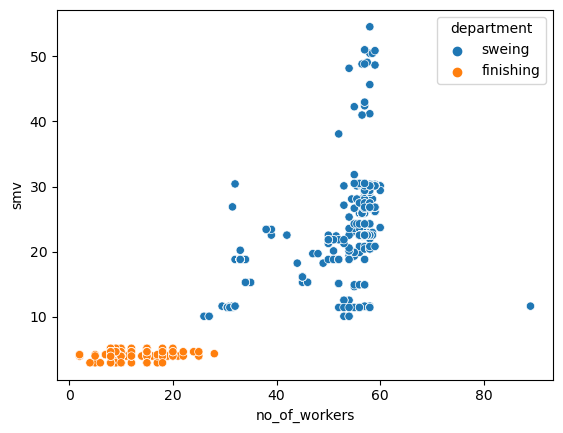

In [28]:
sns.scatterplot(data=df, x="no_of_workers", y="smv", hue="department")

In [29]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers'],
      dtype='object')

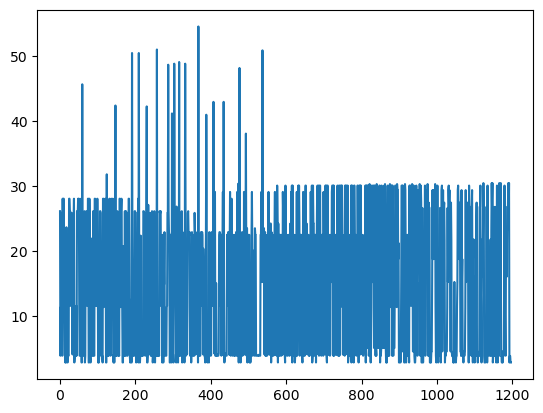

In [30]:
pyplot.plot(df.index,df.smv)

In [31]:
df.wip.isnull().sum()

506

<Axes: xlabel='department', ylabel='wip'>

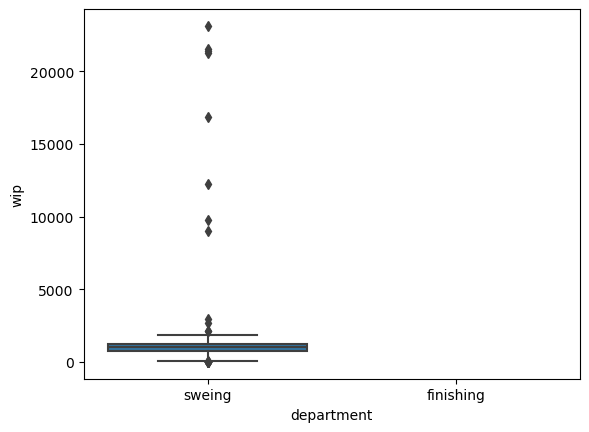

In [32]:
sns.boxplot(x='department',y='wip',data=df)

([<matplotlib.axis.YTick at 0x1f14363fca0>,
 [Text(0, 0, '0'),
  Text(0, 2500, '2500'),
  Text(0, 5000, '5000'),
  Text(0, 7500, '7500'),
  Text(0, 10000, '10000'),
  Text(0, 12500, '12500'),
  Text(0, 15000, '15000'),
  Text(0, 17500, '17500'),
  Text(0, 20000, '20000'),
  Text(0, 22500, '22500'),
  Text(0, 25000, '25000'),
  Text(0, 27500, '27500')])

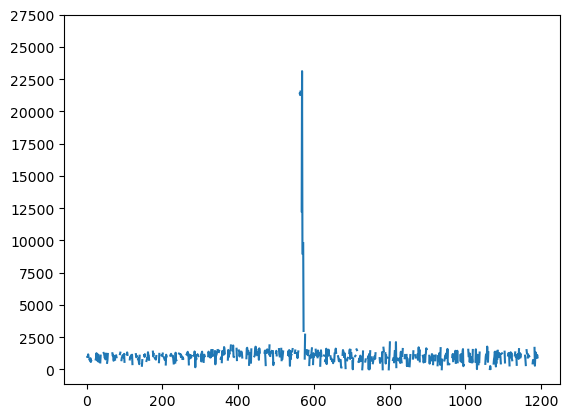

In [33]:
pyplot.plot(df.index,df.wip)
plt.yticks(np.arange(0,30000,step=2500))

In [34]:
df[df['wip']>2500].shape

(10, 13)

In [35]:
df[df['wip']>2500]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
561,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5
563,Quarter1,sweing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5
564,Quarter1,sweing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0
565,Quarter1,sweing,Monday,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0
568,Quarter1,sweing,Monday,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0
569,Quarter1,sweing,Monday,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56.5
570,Quarter1,sweing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0
572,Quarter1,sweing,Monday,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54.0
573,Quarter1,sweing,Monday,6,0.70,18.79,2984.0,3960,30,0.0,0,0,33.0
577,Quarter1,sweing,Monday,7,0.70,24.26,2698.0,6720,0,0.0,0,0,56.0


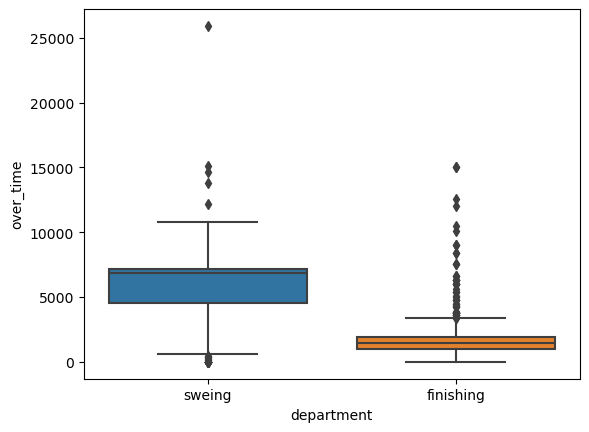

In [36]:
sns.boxplot(x='department',y='over_time',data=df)
plt.show()

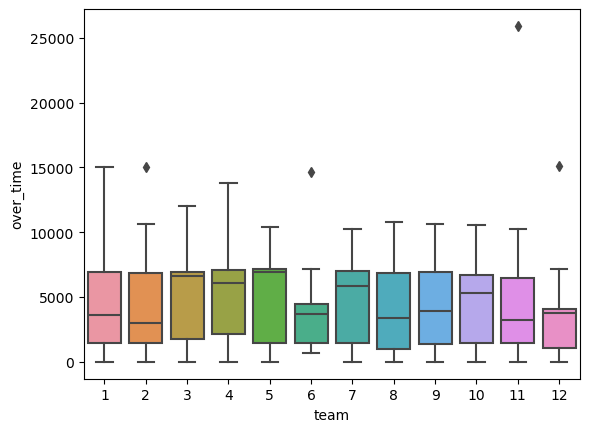

In [37]:
sns.boxplot(x='team',y='over_time',data=df)
plt.show()

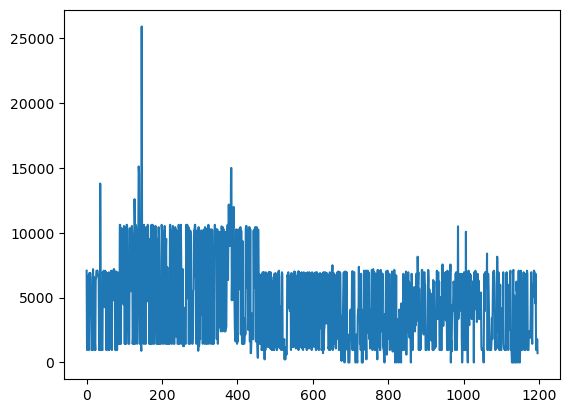

In [38]:
pyplot.plot(df.index,df.over_time)

In [39]:
df[df['over_time']>12000].shape

(8, 13)

In [40]:
df[df['over_time']>12000]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
36,Quarter1,sweing,Saturday,4,0.70,23.69,544.0,13800,0,0.0,0,0,60.0
127,Quarter2,finishing,Thursday,4,0.80,3.94,NaN,12600,0,0.0,0,0,20.0
138,Quarter2,sweing,Thursday,12,0.80,11.61,548.0,15120,63,0.0,0,0,31.5
139,Quarter2,sweing,Thursday,6,0.80,11.41,411.0,14640,50,0.0,0,0,30.5
146,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0
377,Quarter4,sweing,Thursday,1,0.70,22.94,1384.0,12180,63,0.0,0,0,57.0
383,Quarter4,finishing,Thursday,1,0.70,3.94,NaN,15000,0,0.0,0,0,25.0
384,Quarter4,finishing,Thursday,2,0.70,3.94,NaN,15000,0,0.0,0,0,25.0


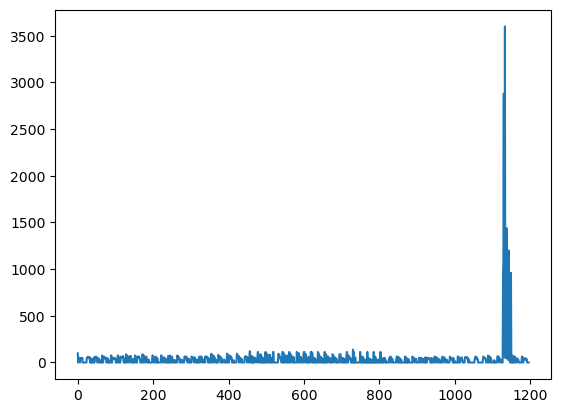

In [41]:
pyplot.plot(df.index,df.incentive)

In [42]:
df[df['incentive']>150].shape

(10, 13)

In [43]:
df[df['incentive']>150]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
1128,Quarter2,finishing,Monday,11,0.80,2.90,NaN,0,960,0.0,0,0,8.0
1129,Quarter2,finishing,Monday,12,0.80,4.60,NaN,0,1080,0.0,0,0,9.0
1130,Quarter2,finishing,Monday,5,0.60,3.94,NaN,0,2880,0.0,0,0,12.0
1133,Quarter2,finishing,Monday,9,0.75,2.90,NaN,0,3600,0.0,0,0,15.0
1137,Quarter2,finishing,Monday,3,0.80,4.60,NaN,0,1440,0.0,0,0,12.0
1138,Quarter2,finishing,Monday,4,0.75,3.94,NaN,0,960,0.0,0,0,8.0
1139,Quarter2,finishing,Monday,1,0.75,3.94,NaN,0,960,0.0,0,0,8.0
1143,Quarter2,finishing,Monday,2,0.70,3.90,NaN,0,1200,0.0,0,0,10.0
1148,Quarter2,finishing,Monday,10,0.70,2.90,NaN,0,960,0.0,0,0,8.0
1149,Quarter2,finishing,Monday,8,0.65,3.90,NaN,0,960,0.0,0,0,8.0


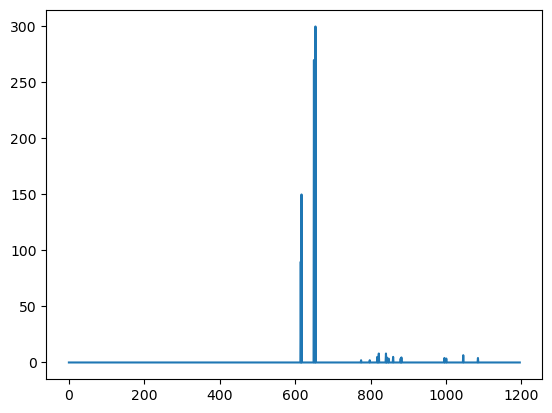

In [44]:
pyplot.plot(df.index,df.idle_time)

In [45]:
df[df['idle_time']>20].shape

(4, 13)

In [46]:
df[df['idle_time']>20]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
615,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5
617,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5
650,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0
654,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0


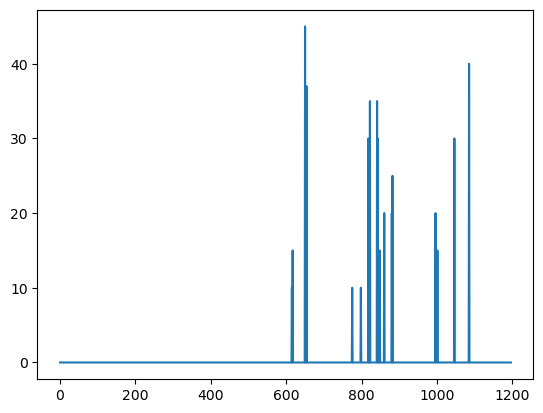

In [47]:
pyplot.plot(df.index,df.idle_men)

In [48]:
df[df['idle_men']>0].shape

(18, 13)

In [49]:
df[df['idle_men']>0]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
615,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5
617,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5
650,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0
654,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0
775,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0
798,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0
818,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0
822,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0
841,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0
843,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0


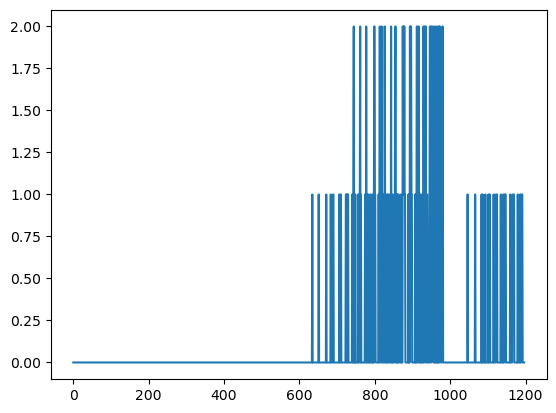

In [50]:
pyplot.plot(df.index,df.no_of_style_change)

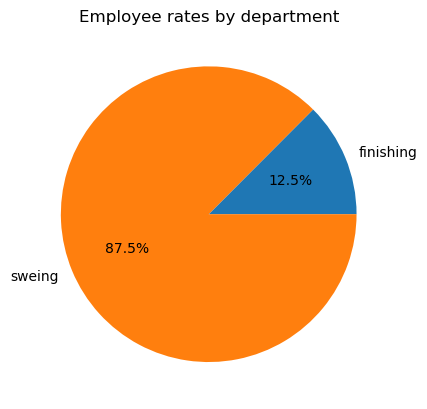

In [51]:
data = df.groupby(['department']).no_of_workers.sum()
data.plot.pie(title="Employee rates by department",autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

C:\Users\werka\AppData\Local\Temp\ipykernel_45356\1443435183.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y.actual_productivity)
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='actual_productivity', ylabel='Density'>

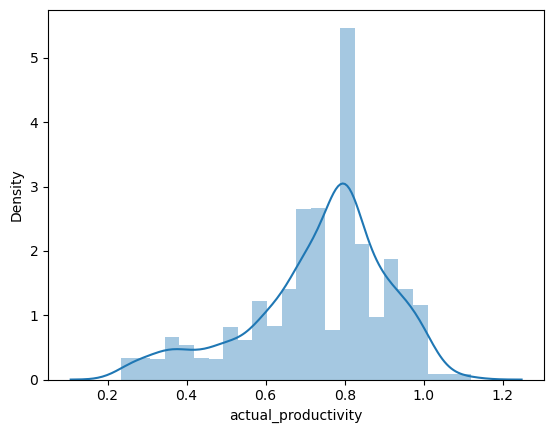

In [52]:
sns.distplot(y.actual_productivity)

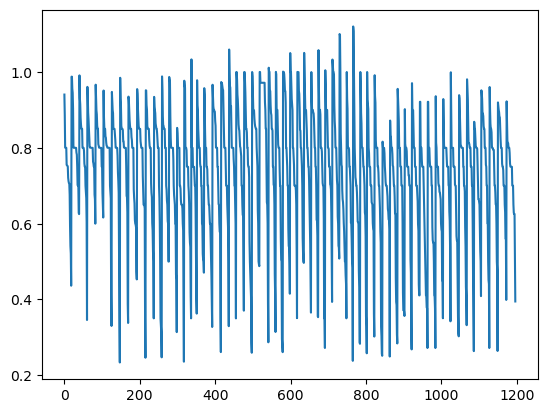

In [53]:
pyplot.plot(y.index,y.actual_productivity)

C:\Users\werka\AppData\Local\Temp\ipykernel_45356\1127989032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['targeted_productivity'])
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='targeted_productivity', ylabel='Density'>

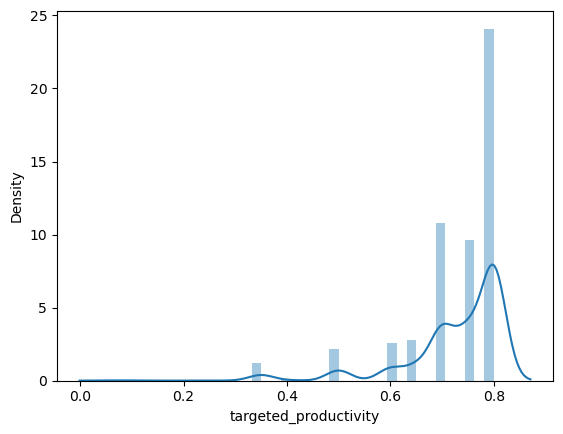

In [54]:
sns.distplot(df['targeted_productivity'])

In [55]:
df.targeted_productivity.value_counts()

targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64

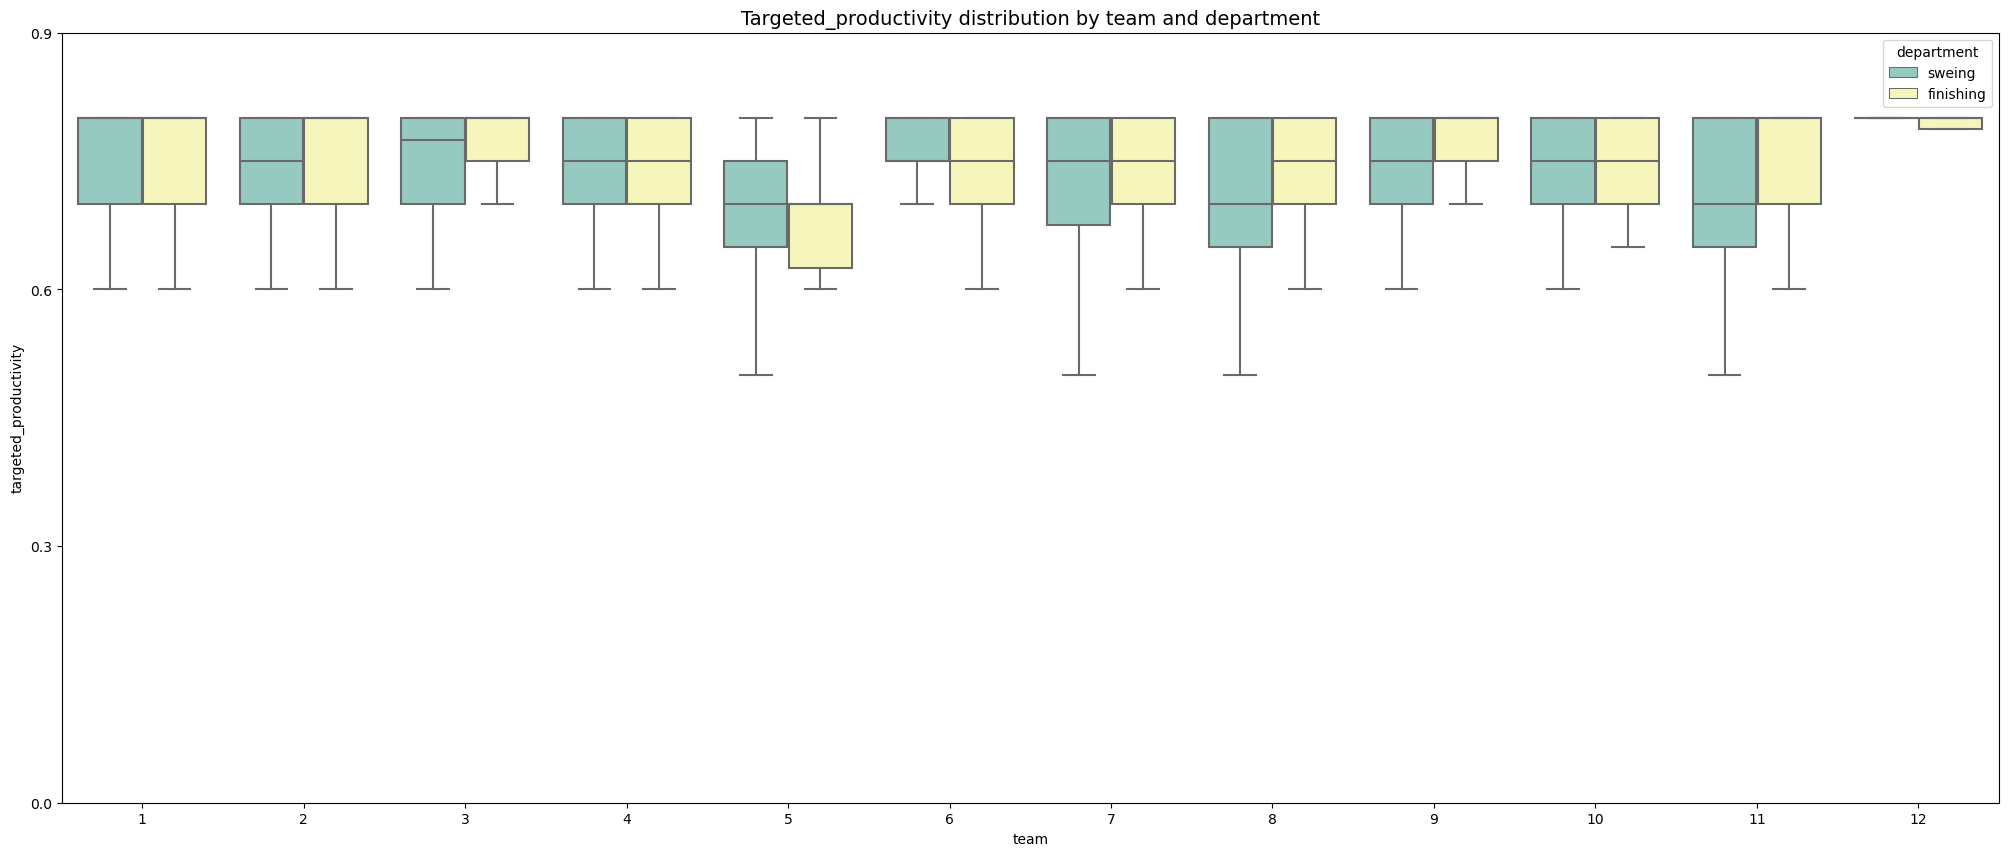

In [56]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = 'targeted_productivity', data = df,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Targeted_productivity distribution by team and department',fontsize= 14)
plt.show()

In [57]:
df['wip'].isnull().sum()

506

In [58]:
df['wip'].fillna(0,inplace=True)

C:\Users\werka\AppData\Local\Temp\ipykernel_45356\3733982707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(0,inplace=True)


In [59]:
df['wip'].isnull().sum()

0

In [60]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,"quarter")
df = create_dummies(df,"department")
df = create_dummies(df,"day")
df = create_dummies(df,"team")

df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4',
       'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11',
       'team_12'],
      dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["no_of_style_change_enc"] = le.fit_transform(df["no_of_style_change"])
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,...,False,False,False,False,True,False,False,False,False,0
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,...,False,False,False,False,False,False,False,False,False,0
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,...,False,False,False,False,False,False,False,True,False,0
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,...,False,False,False,False,False,False,False,False,True,0
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,...,False,False,True,False,False,False,False,False,False,0


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["no_of_style_change_enc"] = le.fit_transform(df["no_of_style_change"])
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,...,False,False,False,False,True,False,False,False,False,0
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,...,False,False,False,False,False,False,False,False,False,0
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,...,False,False,False,False,False,False,False,True,False,0
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,...,False,False,False,False,False,False,False,False,True,0
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,...,False,False,True,False,False,False,False,False,False,0


In [63]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4',
       'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11',
       'team_12', 'no_of_style_change_enc'],
      dtype='object')

In [64]:
df['diff']=y.actual_productivity-df.targeted_productivity
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4',
       'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11',
       'team_12', 'no_of_style_change_enc', 'diff'],
      dtype='object')

In [65]:
df['diff'].describe()

count    1197.000000
mean        0.005459
std         0.160082
min        -0.561958
25%        -0.009556
50%         0.000505
75%         0.099111
max         0.644375
Name: diff, dtype: float64

In [66]:
df['Target_label']=np.nan
df.head()
df.loc[df['diff']<0,'Target_label'] = -1
df.loc[(df['diff']==0), 'Target_label'] = 0
df.loc[df['diff']>0, 'Target_label'] = 1
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc,diff,Target_label
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,...,False,False,True,False,False,False,False,0,0.140725,1.0
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,...,False,False,False,False,False,False,False,0,0.136500,1.0
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,...,False,False,False,False,False,True,False,0,0.000570,1.0
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,...,False,False,False,False,False,False,True,0,0.000570,1.0
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,...,True,False,False,False,False,False,False,0,0.000382,1.0


In [67]:
df[df['Target_label']==0]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc,diff,Target_label
163,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,...,False,False,False,False,True,False,False,0,0.0,0.0
182,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,...,False,False,False,False,False,False,False,0,0.0,0.0
183,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,...,False,False,False,False,True,False,False,0,0.0,0.0
207,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,...,False,False,False,False,False,False,False,0,0.0,0.0
229,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,...,False,False,False,False,False,False,False,0,0.0,0.0
855,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,...,False,False,True,False,False,False,False,2,0.0,0.0


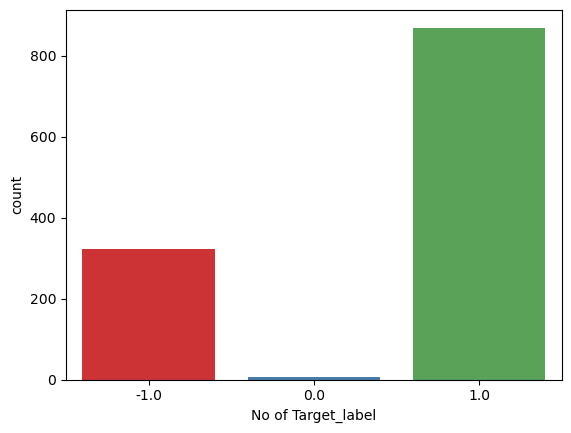

In [68]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

In [69]:
df['Target_label'].value_counts()df['Target_label'].value_count

Target_label
 1.0    869
-1.0    322
 0.0      6
Name: count, dtype: int64

In [70]:
df['Target_label'] = [-1 if x==-1 else 1 for x in df['Target_label']]

In [71]:
df['Target_label'].value_counts()

Target_label
 1    875
-1    322
Name: count, dtype: int64

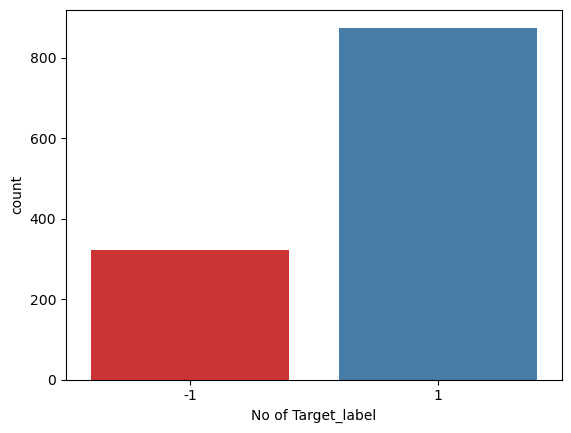

In [72]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

In [73]:
!pip install imbalanced-learn

In [74]:
# check version number
import imblearn
print(imblearn.__version__)

0.12.2


In [75]:
df1=df.drop(['quarter', 'department', 'day', 'team'],axis=1)

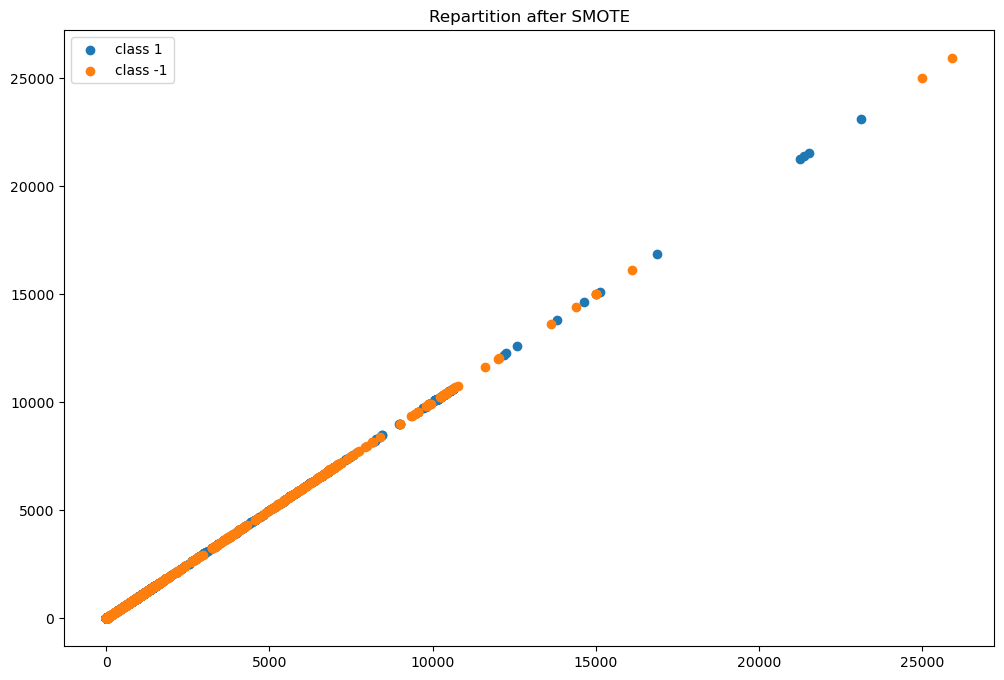

In [76]:
from imblearn.over_sampling import SMOTE
X = df1.loc[:, df1.columns != 'Target_label']
y = df1.Target_label
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)
plt.figure(figsize=(12, 8))
plt.title('Repartition after SMOTE')

#plt.scatter(X_smote[y_smote==1][:, 0], X_smote[y_smote==1][:, 1], label='class 1')
#plt.scatter(X_smote[y_smote==0][:, 0], X_smote[y_smote==0][:, 1], label='class 0')
plt.scatter(X_smote[y_smote==1], X_smote[y_smote==1], label='class 1')
plt.scatter(X_smote[y_smote==-1], X_smote[y_smote==-1], label='class -1')
plt.legend()
plt.grid(False)
plt.show()

In [77]:
X_smote.shape, y_smote.shape

((1750, 36), (1750,))

In [78]:
df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
df.shape

(1750, 37)

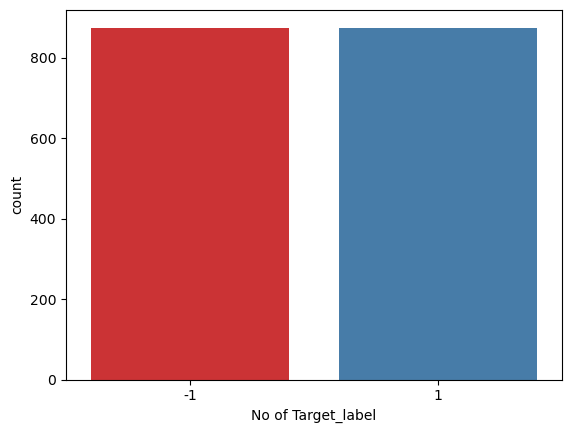

In [79]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

In [80]:
from sklearn.model_selection import train_test_split

columns = ['smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_workers', 
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_enc']

X = df[columns]
y = df['Target_label']

y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [81]:
# train_df = X_train.reset_index(drop=True)
# val_df = X_val.reset_index(drop=True)

In [82]:
y_train.shape

(1260, 2)

In [83]:
X_train.shape

(1260, 33)

In [84]:
X_test.shape

(350, 33)

In [85]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [276]:
y_train.shape

(1260, 2)

In [277]:
num_classes = y_train.shape[1]

In [278]:
num_classes

2

In [279]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [280]:
# Define window length for TimeseriesGenerator
window_length = 24 # Assuming a window length of 24 samples

# Create TimeseriesGenerator for training data
train_generator = TimeseriesGenerator(X_train, y_train, length=window_length, batch_size=32)

# Create TimeseriesGenerator for validation data
val_generator = TimeseriesGenerator(X_val, y_val, length=window_length, batch_size=32)

# Create TimeseriesGenerator for test data
test_generator = TimeseriesGenerator(X_test, y_test, length=window_length, batch_size=32)

In [281]:
train_generator.data.shape

(1260, 33)

In [282]:
# train_df = train_df.reset_index(drop=True)
# val_df = val_df.reset_index(drop=True)

In [283]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Attention, Concatenate, TimeDistributed
from tensorflow.keras.regularizers import l1_l2

In [310]:
# Define the NeuralNetworkModel class
class NeuralNetworkModel:
    def __init__(self):
        self.model = None

    def build_lstm(self, input_shape, num_classes, optimizer):
        self.model = Sequential()
        # self.model.add(LSTM(units=50, input_shape=input_shape))
        # self.model.add(Dense(2, activation='softmax'))  # Assuming 3 classes for classification
        # self.model.add(LSTM(units=100, input_shape=input_shape, return_sequences=True,
        #                kernel_regularizer=l1_l2(l1=0.005, l2=0.005)))
        # self.model.add(BatchNormalization())
        # self.model.add(Dropout(0.7))

        # # Second LSTM Layer
        # self.model.add(LSTM(units=50, return_sequences=True, kernel_regularizer=l1_l2(l1=0.005, l2=0.005)))
        # self.model.add(BatchNormalization())
        # self.model.add(Dropout(0.9))

        # # Third LSTM Layer
        # self.model.add(LSTM(units=25))
        # self.model.add(Dropout(0.96))

        # Flatten the output to feed into the dense layer
        # self.model.add(Dense(100, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.005)))
        # self.model.add(Dropout(0.95))
        # self.model.add(LSTM(units=100, input_shape=input_shape, return_sequences=True))
        # self.model.add(Dropout(0.4))
        # self.model.add(LSTM(units=50, return_sequences=True))
        # self.model.add(Dropout(0.4))
        # self.model.add(LSTM(units=50, return_sequences=True))
        # self.model.add(Dropout(0.4))
        # self.model.add(LSTM(units=100, return_sequences=True))
        # self.model.add(Dropout(0.4))
        # self.model.add(LSTM(units=50, return_sequences=True))
        # self.model.add(Dropout(0.4))
        # self.model.add(LSTM(units=25, return_sequences=True))
        # self.model.add(Dropout(0.4))
        # self.model.add(Dense(100, activation='relu'))
        # self.model.add(Dropout(0.4))
        # self.model.add(Dense(50, activation='relu'))
        # self.model.add(Dropout(0.5))
        # self.model.add(Dense(25, activation='relu'))
        # self.model.add(Dropout(0.5))
        # self.model.add(Dense(25, activation='relu'))
        # self.model.add(Dropout(0.5))
        # self.model.add(Dense(100, activation='relu'))
        # self.model.add(Dropout(0.5))
        # self.model.add(Dense(50, activation='relu'))
        # self.model.add(Dropout(0.5))
        # self.model.add(Dense(50, activation='relu'))
        # self.model.add(Dropout(0.5))
        # self.model.add(Dense(25, activation='relu'))
        # self.model.add(Dropout(0.5))

        self.model.add(LSTM(units=100, input_shape=input_shape, return_sequences=True,
                       kernel_regularizer=l1_l2(l1=0.005, l2=0.005)))
        self.model.add(BatchNormalization())
        self.model.add(Dropout(0.3))

        self.model.add(LSTM(units=50, return_sequences=True, kernel_regularizer=l1_l2(l1=0.005, l2=0.005)))
        self.model.add(BatchNormalization())
        self.model.add(Dropout(0.3))

        self.model.add(LSTM(units=25, return_sequences=False))  # Set return_sequences=False for the last LSTM layer
        self.model.add(Dropout(0.2))

        self.model.add(Dense(100, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.005)))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(2, activation='softmax'))
        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
        

    def train(self, train_generator, val_generator, epochs, batch_size):
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
        history = self.model.fit(train_generator, epochs=epochs, batch_size=batch_size, validation_data=val_generator, callbacks=[early_stopping, reduce_lr])
        return history

    
    def evaluate(self, test_generator):
        # Generate predictions
        y_pred_prob = self.model.predict(test_generator)

        # Extract true labels from test generator
        y_true = []
        for i in range(len(test_generator)):
            _, labels = test_generator[i]
            y_true.extend(labels)
        y_true = np.argmax(y_true, axis=1)

        # Convert predictions to class labels
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Compute evaluation metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')

        return accuracy, precision, recall, f1

In [311]:
# List of optimizers to test for NN
optimizers = {
    'SGD': SGD(),
    'SGD_momentum': SGD(momentum=0.9),
    'Nesterov': SGD(momentum=0.9, nesterov=True),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'Adadelta': tf.keras.optimizers.Adadelta(),
    'Adam': Adam(),
    'AMSGrad': Adam(amsgrad=True),
    'AdamW': AdamW(weight_decay=1e-4),
    'Yogi': Yogi(),
    'Nadam': tf.keras.optimizers.Nadam(),
    'Adamax': tf.keras.optimizers.Adamax()
}

results = {}

# neural_network_model = NeuralNetworkModel()

for name, optimizer in optimizers.items():
    print(f"Training model with {name} optimizer...")
    neural_network_model = NeuralNetworkModel()
    neural_network_model.build_lstm((window_length, X_train.shape[1]), num_classes= 2 ,optimizer=optimizer)
    start_time = time.time()
    # history = neural_network_model.train(train_generator, y_train, val_generator, y_val, epochs=1, batch_size=32)
    history = neural_network_model.train(train_generator, val_generator, epochs=50, batch_size=32)
    end_time = time.time()
    test_accuracy, precision, recall, f1 = neural_network_model.evaluate(test_generator)
    training_time = end_time - start_time
    convergence_speed = len(history.history['loss'])
    results[name] = {
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'convergence_speed': convergence_speed,
        'training_time': training_time,
        'history': history
    }

Training model with SGD optimizer...
Epoch 1/50
39/39 [==============================] - 10s 78ms/step - loss: 13.5516 - accuracy: 0.9725 - precision: 0.9725 - recall: 0.9725 - val_loss: 13.4646 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.0100
Epoch 2/50
39/39 [==============================] - 1s 31ms/step - loss: 12.9123 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 12.9222 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.0100
Epoch 3/50
39/39 [==============================] - 1s 33ms/step - loss: 12.4372 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 12.4269 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.0100
Epoch 4/50
39/39 [==============================] - 1s 31ms/step - loss: 11.9962 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 11.9598 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.0100
Epoch 5/50

In [312]:
# Print results
print("\nResults:")
for name, result in results.items():
    print(f"{name}: Test Accuracy - {result['test_accuracy']:.4f}, "
          f"Precision - {result['precision']:.4f}, "
          f"Recall - {result['recall']:.4f}, "
          f"F1-score - {result['f1_score']:.4f}, "
          f"Convergence Speed - {result['convergence_speed']} epochs, "
          f"Training Time - {result['training_time']:.2f} seconds")


Results:
SGD: Test Accuracy - 1.0000, Precision - 1.0000, Recall - 1.0000, F1-score - 1.0000, Convergence Speed - 50 epochs, Training Time - 72.82 seconds
SGD_momentum: Test Accuracy - 1.0000, Precision - 1.0000, Recall - 1.0000, F1-score - 1.0000, Convergence Speed - 50 epochs, Training Time - 74.55 seconds
Nesterov: Test Accuracy - 1.0000, Precision - 1.0000, Recall - 1.0000, F1-score - 1.0000, Convergence Speed - 50 epochs, Training Time - 76.83 seconds
RMSprop: Test Accuracy - 1.0000, Precision - 1.0000, Recall - 1.0000, F1-score - 1.0000, Convergence Speed - 20 epochs, Training Time - 39.91 seconds
Adagrad: Test Accuracy - 1.0000, Precision - 1.0000, Recall - 1.0000, F1-score - 1.0000, Convergence Speed - 50 epochs, Training Time - 80.18 seconds
Adadelta: Test Accuracy - 1.0000, Precision - 1.0000, Recall - 1.0000, F1-score - 1.0000, Convergence Speed - 50 epochs, Training Time - 77.66 seconds
Adam: Test Accuracy - 1.0000, Precision - 1.0000, Recall - 1.0000, F1-score - 1.0000, C

In [317]:
# Data extraction for the summary
data_info = {
    'Data Name': ["Productivity Prediction of Garment Employees"] * len(optimizers),
    'Data Size': [X_train.shape[0]] * len(optimizers),
    'Number of Features': [X_train.shape[1]] * len(optimizers),
    'Target Feature Type': [y_train.dtype] * len(optimizers),
    'Neural Network Architecture': ["LSTM"] * len(optimizers),
    'Optimization Method': list(optimizers.keys())
}

# Extract results for each optimization method
results_info = {
    'Optimization Method': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Convergence Speed': [],
    'Training Time': [],
    'Training Loss': [],
    'Validation Loss': []
}

# Add the evaluation results for each optimizer
for optimizer, result in results.items():
    results_info['Optimization Method'].append(optimizer)
    results_info['Test Accuracy'].append(result['test_accuracy'])
    results_info['Precision'].append(result['precision'])
    results_info['Recall'].append(result['recall'])
    results_info['F1-score'].append(result['f1_score'])
    results_info['Convergence Speed'].append(result['convergence_speed'])
    results_info['Training Time'].append(result['training_time'])
    results_info['Training Loss'].append(result['history'].history['loss'][0])
    results_info['Validation Loss'].append(result['history'].history['val_loss'][0])

# Create DataFrames and merge them for final results
data_df = pd.DataFrame(data_info)
results_df = pd.DataFrame(results_info)
final_df = pd.merge(data_df, results_df, on='Optimization Method')

# Show the final merged data
final_df.head(12)

,Data Name,Data Size,Number of Features,Target Feature Type,Neural Network Architecture,Optimization Method,Test Accuracy,Precision,Recall,F1-score,Convergence Speed,Training Time,Training Loss,Validation Loss
0,Productivity Prediction of Garment Employees,1260,33,float32,LSTM,SGD,1.0,1.0,1.0,1.0,50,72.820716,13.551558,13.464583
1,Productivity Prediction of Garment Employees,1260,33,float32,LSTM,SGD_momentum,1.0,1.0,1.0,1.0,50,74.549342,12.152087,10.204830
2,Productivity Prediction of Garment Employees,1260,33,float32,LSTM,Nesterov,1.0,1.0,1.0,1.0,50,76.829725,12.156229,10.238107
3,Productivity Prediction of Garment Employees,1260,33,float32,LSTM,RMSprop,1.0,1.0,1.0,1.0,20,39.913198,9.254563,6.323013
4,Productivity Prediction of Garment Employees,1260,33,float32,LSTM,Adagrad,1.0,1.0,1.0,1.0,50,80.176754,13.965479,13.985345
5,Productivity Prediction of Garment Employees,1260,33,float32,LSTM,Adadelta,1.0,1.0,1.0,1.0,50,77.661011,14.081426,14.169516
6,Productivity Prediction of Garment Employees,1260,33,float32,LSTM,Adam,1.0,1.0,1.0,1.0,41,66.014119,10.449631,7.403270
7,Productivity Prediction of Garment Employees,1260,33,float32,LSTM,AMSGrad,1.0,1.0,1.0,1.0,45,75.715350,10.517887,7.510590
8,Productivity Prediction of Garment Employees,1260,33,float32,LSTM,AdamW,1.0,1.0,1.0,1.0,44,74.832629,10.513313,7.439907
9,Productivity Prediction of Garment Employees,1260,33,float32,LSTM,Yogi,1.0,1.0,1.0,1.0,35,80.202790,6.615811,1.274826


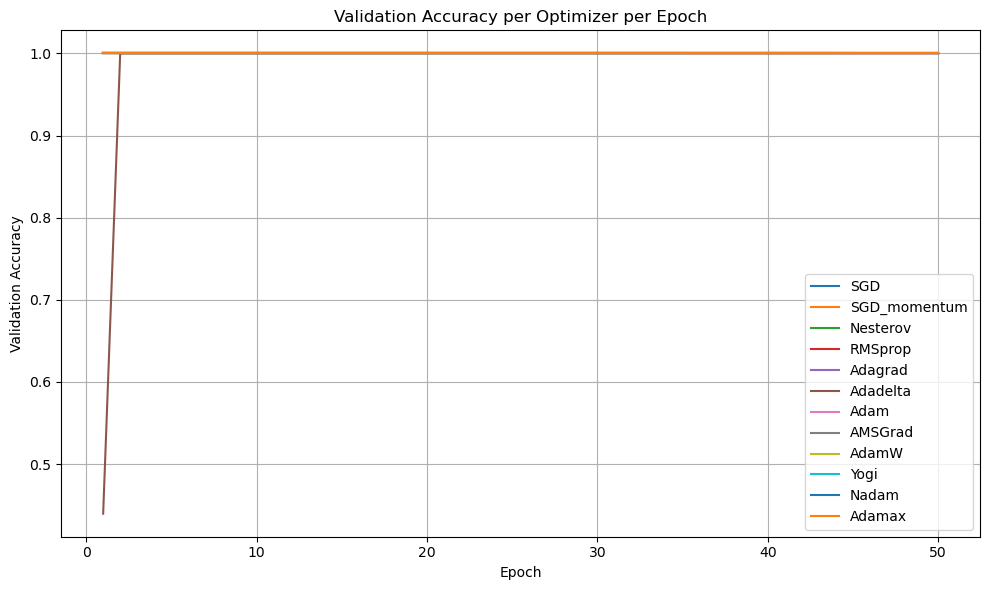

In [318]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot Test Accuracy per Optimizer per Epoch
plt.figure(figsize=(10, 6))

# Loop through results to access each optimizer's training history
for optimizer_name, result in results.items():
    # Retrieve the validation accuracy history for this optimizer
    if 'val_accuracy' in result['history'].history:
        val_acc_history = result['history'].history['val_accuracy']
    else:
        # Sometimes the key might be 'val_acc', depending on TensorFlow version
        val_acc_history = result['history'].history.get('val_acc', [])

    # Plot the validation accuracy history
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label=optimizer_name)

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy per Optimizer per Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


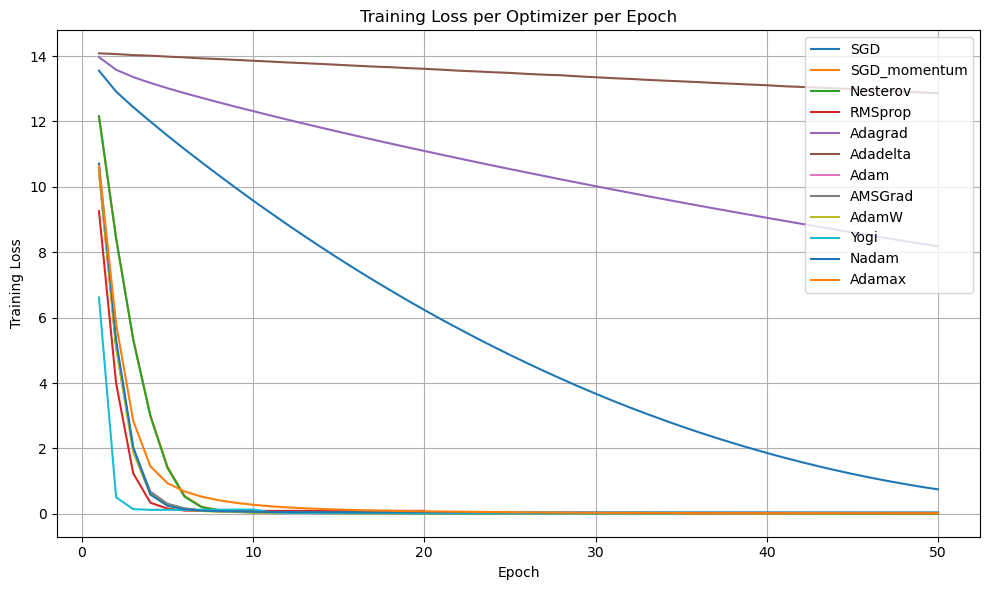

In [319]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot Training Loss per Optimizer per Epoch
plt.figure(figsize=(10, 6))

# Loop through results to access each optimizer's training history
for optimizer_name, result in results.items():
    # Retrieve the training loss history for this optimizer
    if 'loss' in result['history'].history:
        loss_history = result['history'].history['loss']
    else:
        # In case the loss key isn't found (unexpected behavior), use a default empty list
        loss_history = []

    # Plot the training loss history
    plt.plot(range(1, len(loss_history) + 1), loss_history, label=optimizer_name)

# Set plot labels and titles
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss per Optimizer per Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [320]:
final_df.to_csv('Productivity-Prediction-of-Garment Employees', index=False)

In [10]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from ucimlrepo import fetch_ucirepo

# Fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets.iloc[:, 0]  # Assuming the target is the first column



In [16]:
y = pd.Series(y)

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=[object]).columns

# Handle missing values in numeric columns
X.loc[:, numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Encode categorical features
X = pd.get_dummies(X, columns=categorical_cols)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Handle missing values in target
y = y.fillna(y.median())

# Ensure target is numeric
y = pd.to_numeric(y)

# Categorize target
bins = [0, 0.5, 1, np.inf]
labels = ['Low', 'Normal', 'High']
y_categorized = pd.cut(y.values.ravel(), bins=bins, labels=labels, right=False)

# One-hot encode target
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y_categorized)

In [23]:
# Preprocess dataset
def preprocess_data(X, y):
    # Ensure y is a Series
    y = pd.Series(y)

    # Separate numeric and categorical columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    categorical_cols = X.select_dtypes(include=[object]).columns

    # Handle missing values in numeric columns
    X.loc[:, numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

    # Encode categorical features
    X = pd.get_dummies(X, columns=categorical_cols)

    # Normalize features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Handle missing values in target
    y = y.fillna(y.median())

    # Ensure target is numeric
    y = pd.to_numeric(y)

    # Categorize target
    bins = [0, 0.5, 1, np.inf]
    labels = ['Low', 'Normal', 'High']
    y_categorized = pd.cut(y.values.ravel(), bins=bins, labels=labels, right=False)
        
    # One-hot encode target
    lb = LabelBinarizer()
    y_encoded = lb.fit_transform(y_categorized)
    
    return X_scaled, y_encoded, lb, scaler

In [24]:
X_processed, y_processed, lb, scaler = preprocess_data(X, y)

In [55]:
# Split the data into training, validation, and test sets
def split_data(X, y, train_size=0.7, val_size=0.15):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size/(1-train_size), shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [56]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X_processed, y_processed , 0.7, 0.15)

In [57]:
# Create TimeseriesGenerator for LSTM
def create_generators(X_train, X_val, X_test, y_train, y_val, y_test, window_length=10, batch_size=32):
    train_gen = TimeseriesGenerator(X_train, y_train, length=window_length, batch_size=batch_size)
    val_gen = TimeseriesGenerator(X_val, y_val, length=window_length, batch_size=batch_size)
    test_gen = TimeseriesGenerator(X_test, y_test, length=window_length, batch_size=batch_size)
    return train_gen, val_gen, test_gen

In [58]:
train_gen, val_gen, test_gen = create_generators(X_train, X_val, X_test, y_train, y_val, y_test)

In [59]:
# Define the NeuralNetworkModel class
class NeuralNetworkModel:
    def __init__(self):
        self.model = None

    def build_lstm(self, input_shape, num_classes, optimizer):
        self.model = Sequential()
        self.model.add(LSTM(units=50, input_shape=input_shape))
        self.model.add(Dense(num_classes, activation='softmax'))  # Assuming 2 classes for classification
        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    def train(self, train_generator, val_generator, epochs, batch_size):
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        history = self.model.fit(train_generator, epochs=epochs, batch_size=batch_size, validation_data=val_generator, callbacks=[early_stopping, reduce_lr])
        return history

    def evaluate(self, test_generator):
        # Generate predictions
        y_pred_prob = self.model.predict(test_generator)

        # Extract true labels from test generator
        y_true = []
        for i in range(len(test_generator)):
            _, labels = test_generator[i]
            y_true.extend(labels)
        y_true = np.argmax(y_true, axis=1)

        # Convert predictions to class labels
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Compute evaluation metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')

        return accuracy, precision, recall, f1

In [71]:
# Train and evaluate the model
window_length = 10
batch_size = 32
num_classes = y_processed.shape[1]
input_shape = (window_length, X_train.shape[1])

optimizers = {
    'SGD': SGD(),
    'SGD_momentum': SGD(momentum=0.9),
    'Nesterov': SGD(momentum=0.9, nesterov=True),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'Adadelta': tf.keras.optimizers.Adadelta(),
    'Adam': Adam(),
    'AMSGrad': Adam(amsgrad=True),
    'AdamW': AdamW(weight_decay=1e-4),
    'Yogi': Yogi(),
    'Nadam': tf.keras.optimizers.Nadam(),
    'Adamax': tf.keras.optimizers.Adamax()
}
results = {}

for name, optimizer in optimizers.items():
    print(f"Training model with {name} optimizer...")
    neural_network_model = NeuralNetworkModel()
    neural_network_model.build_lstm(input_shape, num_classes, optimizer=optimizer)
    start_time = time.time()
    history = neural_network_model.train(train_gen, val_gen, epochs=50, batch_size=batch_size)
    end_time = time.time()
    test_accuracy, precision, recall, f1 = neural_network_model.evaluate(test_gen)
    training_time = end_time - start_time
    convergence_speed = len(history.history['loss'])
    results[name] = {
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'convergence_speed': convergence_speed,
        'training_time': training_time,
        'history': history
    }


Training model with SGD optimizer...
Epoch 1/50
26/26 [==============================] - 2s 31ms/step - loss: 0.9461 - accuracy: 0.6481 - val_loss: 0.7821 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 2/50
26/26 [==============================] - 0s 10ms/step - loss: 0.6345 - accuracy: 0.8597 - val_loss: 0.6480 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 3/50
26/26 [==============================] - 0s 10ms/step - loss: 0.5434 - accuracy: 0.8597 - val_loss: 0.6070 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 0.5140 - accuracy: 0.8597 - val_loss: 0.5931 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 5/50
26/26 [==============================] - 0s 10ms/step - loss: 0.5028 - accuracy: 0.8597 - val_loss: 0.5863 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 6/50
26/26 [==============================] - 0s 11ms/step - loss: 0.4974 - accuracy: 0.8597 - val_loss: 0.5819 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 7/50
26/26 [=====================

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
26/26 [==============================] - 2s 38ms/step - loss: 0.6533 - accuracy: 0.7352 - val_loss: 0.6181 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 2/50
26/26 [==============================] - 0s 9ms/step - loss: 0.5041 - accuracy: 0.8597 - val_loss: 0.5294 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 3/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4882 - accuracy: 0.8597 - val_loss: 0.5403 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 4/50
26/26 [==============================] - 0s 11ms/step - loss: 0.4839 - accuracy: 0.8597 - val_loss: 0.5369 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 5/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4790 - accuracy: 0.8597 - val_loss: 0.5376 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 6/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4751 - accuracy: 0.8597 - val_loss: 0.5381 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 7/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4704 

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
26/26 [==============================] - 2s 36ms/step - loss: 0.6096 - accuracy: 0.7993 - val_loss: 0.6337 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 2/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4918 - accuracy: 0.8597 - val_loss: 0.5400 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 3/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4835 - accuracy: 0.8597 - val_loss: 0.5519 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4779 - accuracy: 0.8597 - val_loss: 0.5387 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 5/50
26/26 [==============================] - 0s 11ms/step - loss: 0.4725 - accuracy: 0.8597 - val_loss: 0.5378 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 6/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4653 - accuracy: 0.8597 - val_loss: 0.5243 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 7/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4595

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
26/26 [==============================] - 2s 31ms/step - loss: 0.6281 - accuracy: 0.8597 - val_loss: 0.5774 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4921 - accuracy: 0.8597 - val_loss: 0.5496 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4797 - accuracy: 0.8597 - val_loss: 0.5238 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4636 - accuracy: 0.8597 - val_loss: 0.5030 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 0s 12ms/step - loss: 0.4440 - accuracy: 0.8597 - val_loss: 0.5102 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4261 - accuracy: 0.8597 - val_loss: 0.4870 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 7/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
26/26 [==============================] - 2s 32ms/step - loss: 1.1111 - accuracy: 0.3362 - val_loss: 1.0600 - val_accuracy: 0.5059 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 0s 9ms/step - loss: 1.0141 - accuracy: 0.6457 - val_loss: 0.9889 - val_accuracy: 0.7235 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 0s 9ms/step - loss: 0.9440 - accuracy: 0.7799 - val_loss: 0.9336 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 0s 9ms/step - loss: 0.8875 - accuracy: 0.8440 - val_loss: 0.8880 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 0s 9ms/step - loss: 0.8400 - accuracy: 0.8597 - val_loss: 0.8494 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 0s 9ms/step - loss: 0.7993 - accuracy: 0.8597 - val_loss: 0.8161 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 7/50
26/26 [==============================] - 0s 10ms/step - loss: 0.7638 -

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
26/26 [==============================] - 2s 35ms/step - loss: 1.1580 - accuracy: 0.1644 - val_loss: 1.1417 - val_accuracy: 0.1059 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 0s 9ms/step - loss: 1.1564 - accuracy: 0.1681 - val_loss: 1.1401 - val_accuracy: 0.1059 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 0s 10ms/step - loss: 1.1548 - accuracy: 0.1693 - val_loss: 1.1386 - val_accuracy: 0.1118 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 1.1532 - accuracy: 0.1778 - val_loss: 1.1370 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 0s 10ms/step - loss: 1.1515 - accuracy: 0.1826 - val_loss: 1.1354 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 0s 10ms/step - loss: 1.1499 - accuracy: 0.1923 - val_loss: 1.1339 - val_accuracy: 0.1059 - lr: 0.0010
Epoch 7/50
26/26 [==============================] - 0s 10ms/step - loss: 1.14

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
26/26 [==============================] - 2s 34ms/step - loss: 0.7357 - accuracy: 0.8150 - val_loss: 0.5828 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4974 - accuracy: 0.8597 - val_loss: 0.5256 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4772 - accuracy: 0.8597 - val_loss: 0.5080 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 0s 11ms/step - loss: 0.4657 - accuracy: 0.8597 - val_loss: 0.5012 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4498 - accuracy: 0.8597 - val_loss: 0.4775 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4287 - accuracy: 0.8597 - val_loss: 0.4476 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 7/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4040

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
26/26 [==============================] - 2s 32ms/step - loss: 0.6184 - accuracy: 0.8452 - val_loss: 0.5624 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 0s 9ms/step - loss: 0.5075 - accuracy: 0.8597 - val_loss: 0.5285 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4845 - accuracy: 0.8597 - val_loss: 0.5393 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4760 - accuracy: 0.8597 - val_loss: 0.5274 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4622 - accuracy: 0.8597 - val_loss: 0.5127 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 0s 8ms/step - loss: 0.4524 - accuracy: 0.8597 - val_loss: 0.4951 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 7/50
26/26 [==============================] - 0s 7ms/step - loss: 0.4321 - 

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
26/26 [==============================] - 2s 35ms/step - loss: 0.5681 - accuracy: 0.8319 - val_loss: 0.5106 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 2/50
26/26 [==============================] - 0s 12ms/step - loss: 0.4982 - accuracy: 0.8597 - val_loss: 0.5423 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 3/50
26/26 [==============================] - 0s 11ms/step - loss: 0.4733 - accuracy: 0.8597 - val_loss: 0.5020 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 4/50
26/26 [==============================] - 0s 12ms/step - loss: 0.4440 - accuracy: 0.8622 - val_loss: 0.5107 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 5/50
26/26 [==============================] - 0s 11ms/step - loss: 0.4720 - accuracy: 0.8597 - val_loss: 0.5776 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 6/50
26/26 [==============================] - 0s 17ms/step - loss: 0.4787 - accuracy: 0.8597 - val_loss: 0.5270 - val_accuracy: 0.8176 - lr: 0.0100
Epoch 7/50
26/26 [==============================] - 0s 13ms/step - loss: 0.4

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
26/26 [==============================] - 2s 39ms/step - loss: 0.7505 - accuracy: 0.7763 - val_loss: 0.5780 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 0s 15ms/step - loss: 0.5062 - accuracy: 0.8597 - val_loss: 0.5439 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 0s 16ms/step - loss: 0.4927 - accuracy: 0.8597 - val_loss: 0.5368 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 0s 13ms/step - loss: 0.4805 - accuracy: 0.8597 - val_loss: 0.5345 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 0s 14ms/step - loss: 0.4659 - accuracy: 0.8597 - val_loss: 0.5193 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 0s 13ms/step - loss: 0.4414 - accuracy: 0.8597 - val_loss: 0.4902 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 7/50
26/26 [==============================] - 0s 17ms/step - loss: 0.4

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
26/26 [==============================] - 3s 35ms/step - loss: 0.8784 - accuracy: 0.7328 - val_loss: 0.6733 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 0s 10ms/step - loss: 0.5420 - accuracy: 0.8597 - val_loss: 0.5794 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4915 - accuracy: 0.8597 - val_loss: 0.5725 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4888 - accuracy: 0.8597 - val_loss: 0.5676 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4875 - accuracy: 0.8597 - val_loss: 0.5498 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4831 - accuracy: 0.8597 - val_loss: 0.5531 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 7/50
26/26 [==============================] - 0s 9ms/step - loss: 0.480

C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Print results
print("\nResults:")
for name, result in results.items():
    print(f"{name}: Test Accuracy - {result['test_accuracy']:.4f}, "
          f"Precision - {result['precision']:.4f}, "
          f"Recall - {result['recall']:.4f}, "
          f"F1-score - {result['f1_score']:.4f}, "
          f"Convergence Speed - {result['convergence_speed']} epochs, "
          f"Training Time - {result['training_time']:.2f} seconds")


Results:
SGD: Test Accuracy - 0.8941, Precision - 0.7994, Recall - 0.8941, F1-score - 0.8441, Convergence Speed - 50 epochs, Training Time - 15.97 seconds
SGD_momentum: Test Accuracy - 0.8941, Precision - 0.7994, Recall - 0.8941, F1-score - 0.8441, Convergence Speed - 46 epochs, Training Time - 14.15 seconds
Nesterov: Test Accuracy - 0.8471, Precision - 0.8487, Recall - 0.8471, F1-score - 0.8448, Convergence Speed - 40 epochs, Training Time - 12.45 seconds
RMSprop: Test Accuracy - 0.8941, Precision - 0.7994, Recall - 0.8941, F1-score - 0.8441, Convergence Speed - 27 epochs, Training Time - 9.48 seconds
Adagrad: Test Accuracy - 0.8941, Precision - 0.7994, Recall - 0.8941, F1-score - 0.8441, Convergence Speed - 50 epochs, Training Time - 15.45 seconds
Adadelta: Test Accuracy - 0.2059, Precision - 0.7633, Recall - 0.2059, F1-score - 0.3243, Convergence Speed - 50 epochs, Training Time - 14.87 seconds
Adam: Test Accuracy - 0.8941, Precision - 0.8566, Recall - 0.8941, F1-score - 0.8544, Co

In [73]:
# Data extraction for the summary
data_info = {
    'Data Name': ["Productivity Prediction of Garment Employees"] * len(optimizers),
    'Data Size': [X_train.shape[0]] * len(optimizers),
    'Number of Features': [X_train.shape[1]] * len(optimizers),
    'Target Feature Type': ["Categorical"] * len(optimizers),
    'Neural Network Architecture': ["LSTM"] * len(optimizers),
    'Optimization Method': list(optimizers.keys())
}

# Extract results for each optimization method
results_info = {
    'Optimization Method': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Convergence Speed': [],
    'Training Time': [],
    'Training Loss': [],
    'Validation Loss': []
}

# Add the evaluation results for each optimizer
for optimizer, result in results.items():
    results_info['Optimization Method'].append(optimizer)
    results_info['Test Accuracy'].append(result['test_accuracy'])
    results_info['Precision'].append(result['precision'])
    results_info['Recall'].append(result['recall'])
    results_info['F1-score'].append(result['f1_score'])
    results_info['Convergence Speed'].append(result['convergence_speed'])
    results_info['Training Time'].append(result['training_time'])
    results_info['Training Loss'].append(result['history'].history['loss'][0])
    results_info['Validation Loss'].append(result['history'].history['val_loss'][0])

# Create DataFrames and merge them for final results
data_df = pd.DataFrame(data_info)
results_df = pd.DataFrame(results_info)
final_df = pd.merge(data_df, results_df, on='Optimization Method')

# Show the final merged data
final_df.head(12)

,Data Name,Data Size,Number of Features,Target Feature Type,Neural Network Architecture,Optimization Method,Test Accuracy,Precision,Recall,F1-score,Convergence Speed,Training Time,Training Loss,Validation Loss
0,Productivity Prediction of Garment Employees,837,82,Categorical,LSTM,SGD,0.894118,0.799446,0.894118,0.844136,50,15.972919,0.946124,0.782130
1,Productivity Prediction of Garment Employees,837,82,Categorical,LSTM,SGD_momentum,0.894118,0.799446,0.894118,0.844136,46,14.149626,0.653339,0.618079
2,Productivity Prediction of Garment Employees,837,82,Categorical,LSTM,Nesterov,0.847059,0.848653,0.847059,0.844836,40,12.446942,0.609626,0.633735
3,Productivity Prediction of Garment Employees,837,82,Categorical,LSTM,RMSprop,0.894118,0.799446,0.894118,0.844136,27,9.480767,0.628124,0.577427
4,Productivity Prediction of Garment Employees,837,82,Categorical,LSTM,Adagrad,0.894118,0.799446,0.894118,0.844136,50,15.446470,1.111130,1.060044
5,Productivity Prediction of Garment Employees,837,82,Categorical,LSTM,Adadelta,0.205882,0.763271,0.205882,0.324291,50,14.874502,1.158026,1.141714
6,Productivity Prediction of Garment Employees,837,82,Categorical,LSTM,Adam,0.894118,0.856583,0.894118,0.854412,29,8.915521,0.735658,0.582754
7,Productivity Prediction of Garment Employees,837,82,Categorical,LSTM,AMSGrad,0.894118,0.799446,0.894118,0.844136,26,8.225257,0.791591,0.573775
8,Productivity Prediction of Garment Employees,837,82,Categorical,LSTM,AdamW,0.882353,0.837845,0.882353,0.847968,31,9.069775,0.618442,0.562383
9,Productivity Prediction of Garment Employees,837,82,Categorical,LSTM,Yogi,0.894118,0.799446,0.894118,0.844136,30,12.825585,0.568063,0.510570


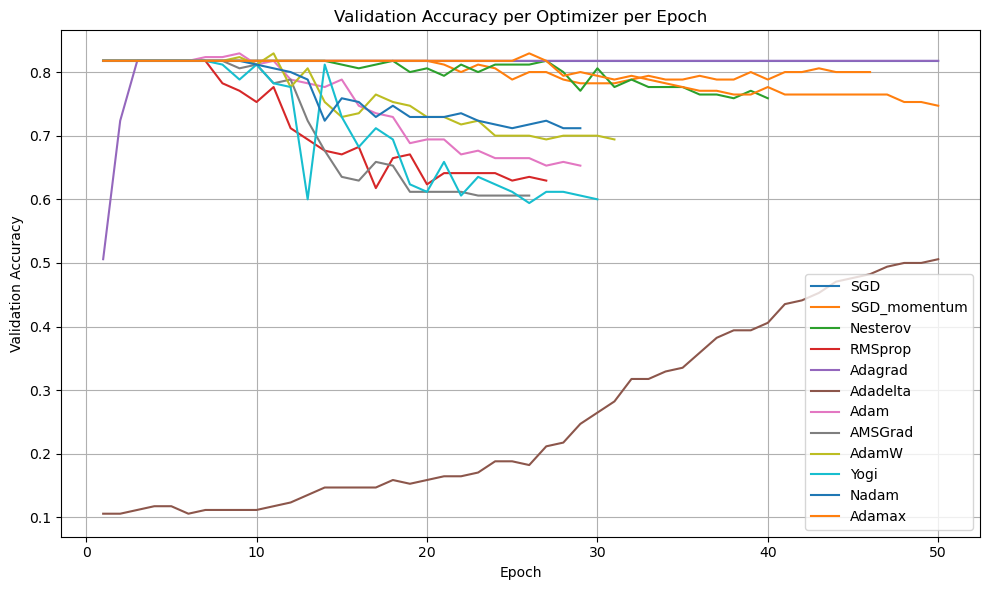

In [74]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot Test Accuracy per Optimizer per Epoch
plt.figure(figsize=(10, 6))

# Loop through results to access each optimizer's training history
for optimizer_name, result in results.items():
    # Retrieve the validation accuracy history for this optimizer
    if 'val_accuracy' in result['history'].history:
        val_acc_history = result['history'].history['val_accuracy']
    else:
        # Sometimes the key might be 'val_acc', depending on TensorFlow version
        val_acc_history = result['history'].history.get('val_acc', [])

    # Plot the validation accuracy history
    plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label=optimizer_name)

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy per Optimizer per Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


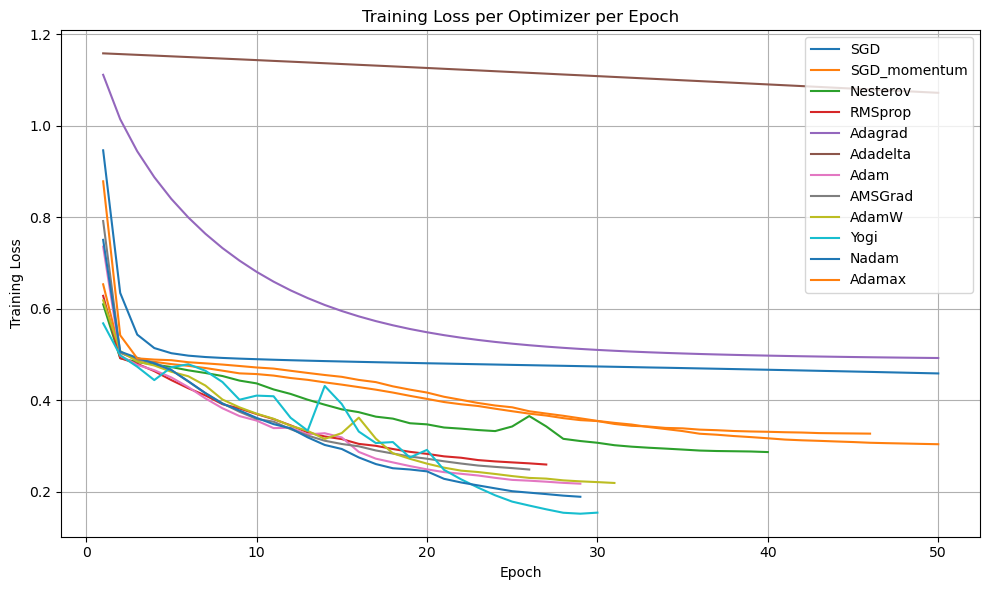

In [75]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot Training Loss per Optimizer per Epoch
plt.figure(figsize=(10, 6))

# Loop through results to access each optimizer's training history
for optimizer_name, result in results.items():
    # Retrieve the training loss history for this optimizer
    if 'loss' in result['history'].history:
        loss_history = result['history'].history['loss']
    else:
        # In case the loss key isn't found (unexpected behavior), use a default empty list
        loss_history = []

    # Plot the training loss history
    plt.plot(range(1, len(loss_history) + 1), loss_history, label=optimizer_name)

# Set plot labels and titles
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss per Optimizer per Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
final_df.to_csv('Productivity-Prediction-of-Garment Employees', index=False)